Part I - Exploratory Data Analysis 

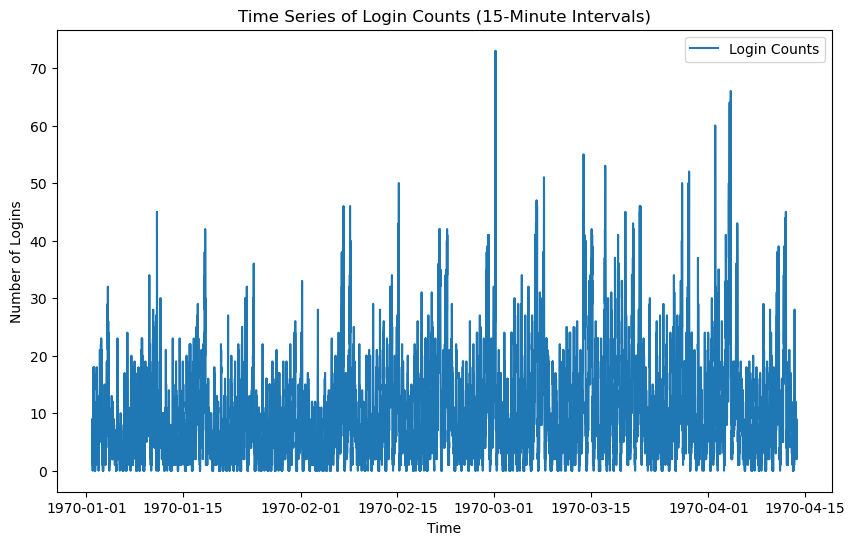

count    9788.000000
mean        9.515938
std         8.328818
min         0.000000
25%         3.000000
50%         7.000000
75%        13.000000
max        73.000000
dtype: float64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the logins.json file
file_path = 'logins.json'  # Replace with the path to your file
logins_data = pd.read_json(file_path)

# Convert the 'login_time' to a datetime format
logins_data['login_time'] = pd.to_datetime(logins_data['login_time'])

# Set the 'login_time' as the index for resampling
logins_data.set_index('login_time', inplace=True)

# Resample the data into 15-minute intervals, counting the number of logins in each interval
login_counts = logins_data.resample('15T').size()

# Plot the time series of login counts
plt.figure(figsize=(10, 6))
plt.plot(login_counts, label='Login Counts')
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.title('Time Series of Login Counts (15-Minute Intervals)')
plt.legend()
plt.show()

# Calculate descriptive statistics to summarize the login counts
print(login_counts.describe())


Experiments and metrics design

Q: "What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?" 

A: I believe that a key measure of success of this experiment in encouraging driver partners to serve both cities would be the  percentage of driver partners who serve both cities (Gotham and Metropolis) before and after the toll reimbursement program. This would encourage driver partners to cross between the two cities, as it tracks the behavior that the experiment is designed to influence.

The goal of the toll reimbursment is to increase # of drivers available, reduce exclusivity caused by the toll bridge which would easily track driver location data and trip data before and after the experiment 

Q: Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success.

A: We would conduct A/B testing framework to compare driver behavior before and after the experiment. We would perform the following steps steps: 
    1. Pre-experiment baseline 
    2. Introduct thye toll reimbursement
    3. Track Metrics 
    
   

Q: What statistical test(s) you will conduct to verify the significance of the observation?
A: 

Proportion test (Two-proportion Z-test or Chi-square test): 
- Hypothesis: Test whether the proportion of drivers serving both cities has increased after the toll reimbursement.
- Null Hypothesis (H₀): The proportion of drivers serving both cities is the same before and after the reimbursement.
- Alternative Hypothesis (H₁): The proportion of drivers serving both cities has increased after the reimbursement.

Paired t-test (or Wilcoxon signed-rank test if data is not normally distributed): 
- Null Hypothesis (H₀): There is no change in the number of cross-city trips after the reimbursement.
- Alternative Hypothesis (H₁): The number of cross-city trips has increased after the reimbursement.

Q: How you would interpret the results and provide recommendations to the city operations team along with any caveats?
A: If the p value is <.05, it would suggrest that the toll reimbursement is effective in encouraging driver to cross the cities. If the paired t-test shows an increase in the # of cross0city trips after hte toll reimbursement, it supports the policy's effectiveness. There are some caveats in that there is seasonality and external factors like holidays or city events. Additionally, behavior changes over time could impact the drivers servicing both cities. 

In [4]:
import pandas as pd
import json

# Load the JSON data
with open('ultimate_data_challenge.json') as file:
    data = json.load(file)

df = pd.DataFrame(data)

In [5]:
# Display basic info and first few rows
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB
None
             city  trips_in_first_30_days signup_date  avg_rating_of_driv

In [6]:
# Check for missing values
print(df.isnull().sum())

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64


In [7]:
df['ultimate_black_user'] = df['ultimate_black_user'].replace({1: 'True', 0: 'False'})

In [8]:
# Drop missing values as appropriate
df = df.dropna()


In [9]:
# Convert dates to datetime format
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [10]:
# Calculate the retention status
six_months_after_signup = df['signup_date'] + pd.DateOffset(months=6)
df['retained'] = df['last_trip_date'] >= six_months_after_signup

# Drop irrelevant columns if necessary and check the updated DataFrame
df.drop(columns=['signup_date', 'last_trip_date'], inplace=True)
print(df.head())

             city  trips_in_first_30_days  avg_rating_of_driver  avg_surge  \
0  King's Landing                       4                   4.7       1.10   
1         Astapor                       0                   5.0       1.00   
2         Astapor                       3                   4.3       1.00   
3  King's Landing                       9                   4.6       1.14   
4      Winterfell                      14                   4.4       1.19   

     phone  surge_pct  ultimate_black_user  weekday_pct  avg_dist  \
0   iPhone       15.4                 True         46.2      3.67   
1  Android        0.0                False         50.0      8.26   
2   iPhone        0.0                False        100.0      0.77   
3   iPhone       20.0                 True         80.0      2.36   
4  Android       11.8                False         82.4      3.13   

   avg_rating_by_driver  retained  
0                   5.0     False  
1                   5.0     False  
2       

In [11]:
retention_rate = df['retained'].mean()
print(f"Fraction of users retained: {retention_rate:.2%}")

Fraction of users retained: 0.03%


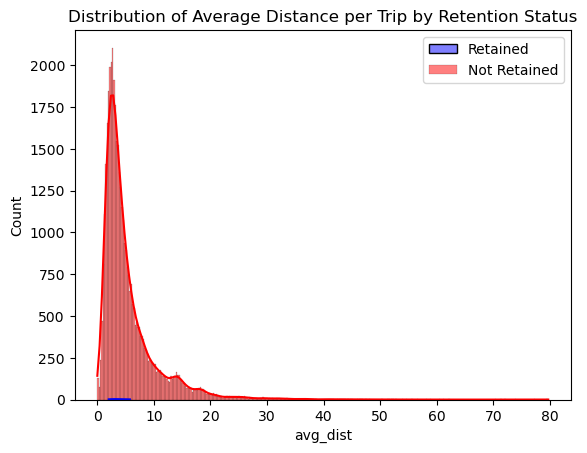

In [18]:
sns.histplot(df[df['retained']]['avg_dist'], kde=True, label='Retained', color='blue')
sns.histplot(df[~df['retained']]['avg_dist'], kde=True, label='Not Retained', color='red')
plt.legend()
plt.title('Distribution of Average Distance per Trip by Retention Status')
plt.show()

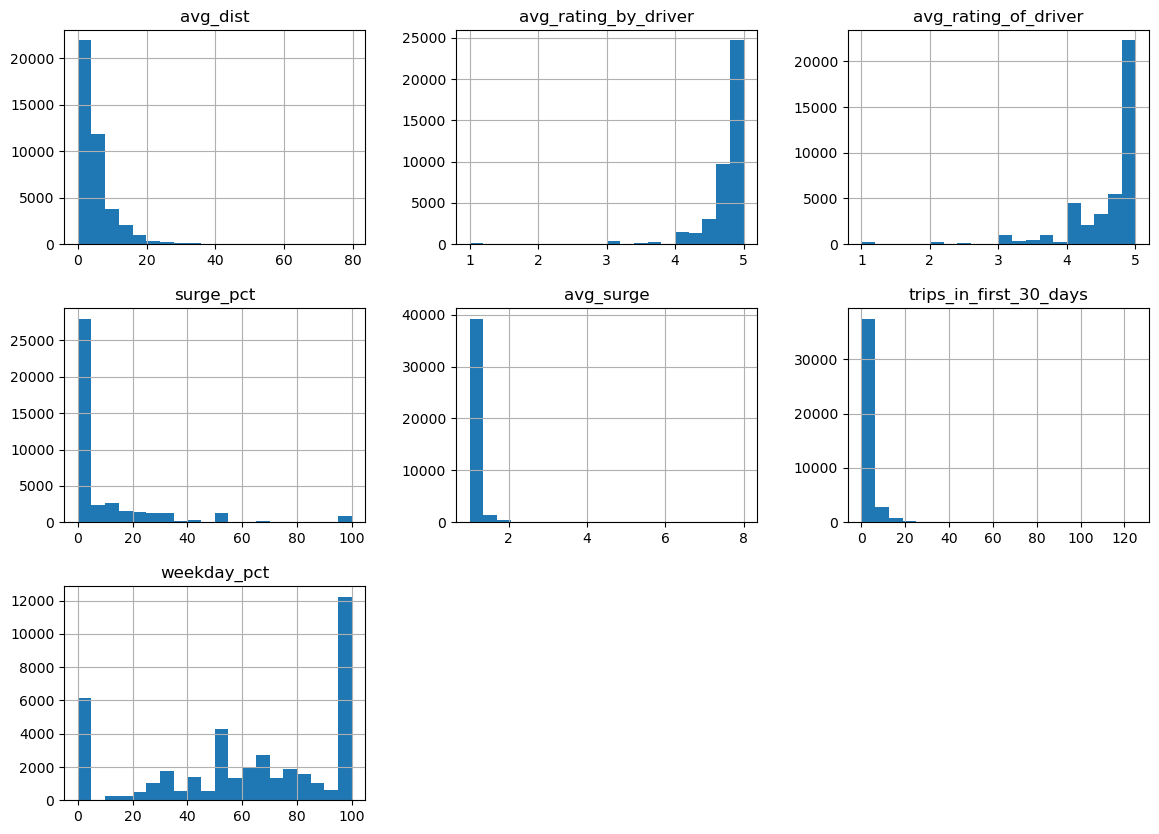

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
df[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'surge_pct', 'avg_surge', 'trips_in_first_30_days', 'weekday_pct']].hist(bins=20, figsize=(14, 10))
plt.show()

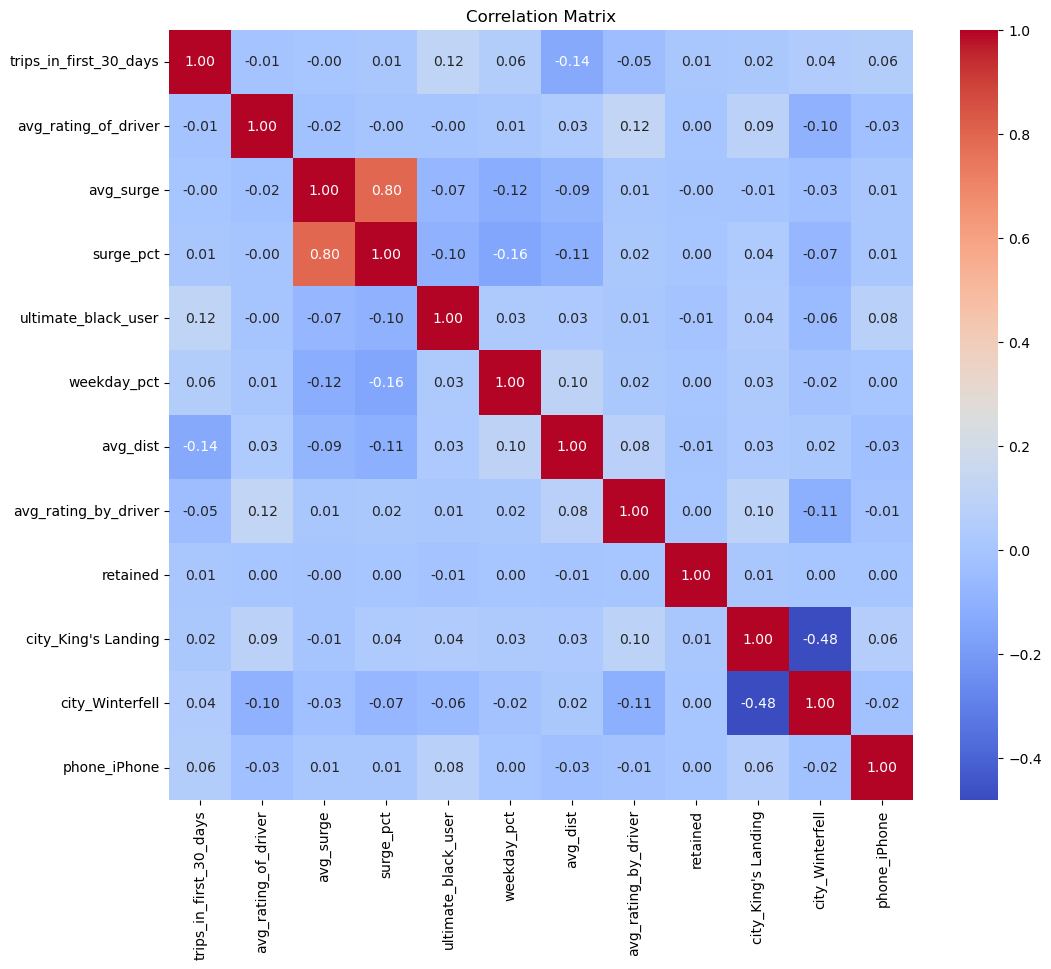

In [15]:
# Correlation matrix
df_encoded = pd.get_dummies(df, drop_first=True)

# Correlation matrix for the encoded DataFrame
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [31]:
#Random Forest 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Feature selection and target variable
X = df[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'surge_pct', 
        'avg_surge', 'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct']]

# Convert categorical variables to dummy/indicator variables if necessary
# In this case, `ultimate_black_user` is already a boolean, so this step is optional
# X = pd.get_dummies(X) 

y = df['retained']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Classification report
print(classification_report(y_test, y_pred))

# ROC AUC Score
y_prob = model.predict_proba(X_test)[:, 1]  # Get the probability scores for the positive class
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")

Accuracy: 99.97%
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     12430
        True       0.00      0.00      0.00         4

    accuracy                           1.00     12434
   macro avg       0.50      0.50      0.50     12434
weighted avg       1.00      1.00      1.00     12434

ROC AUC Score: 0.49


C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Prepare data for modeling
X = df[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'surge_pct', 
        'avg_surge', 'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct']]
y = df['retained']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the model
model = LogisticRegression(max_iter=1000, random_state=42)  # Increased iterations to ensure convergence
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class

# Classification report
print(classification_report(y_test, y_pred))

# ROC AUC Score
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.2f}")

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     12430
        True       0.00      0.00      0.00         4

    accuracy                           1.00     12434
   macro avg       0.50      0.50      0.50     12434
weighted avg       1.00      1.00      1.00     12434

ROC AUC Score: 0.63


C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
importances = clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance_df)

                  Feature  Importance
0                avg_dist    0.242577
7             weekday_pct    0.216198
3               surge_pct    0.123805
5  trips_in_first_30_days    0.123536
2    avg_rating_of_driver    0.119280
4               avg_surge    0.080470
1    avg_rating_by_driver    0.066471
6     ultimate_black_user    0.027663


Logistic Regression is a solid choice for this problem due to its interpretability and efficiency. However, its performance might be limited if the data has non-linear relationships or if the dataset is imbalanced. In such cases, exploring more complex models like Random Forests or Gradient Boosting Machines, and using additional techniques to handle imbalance, could improve results.

Ultimate can leverage the insights gained from the predictive model to enhance long-term rider retention through the following: 
1. Targeted engagement
2. Enhanced features and services
3. Personalized recommendation